<p><img height="45px" src="https://cdn1.iconfinder.com/data/icons/logotypes/32/square-twitter-512.png" align="left" hspace="10px" vspace="0px"></p>
<font size = "6.5" color = "0E3FE3"><b>Tweepy</b></font>

## Acceder a la API

In [9]:
##!pip install tweepy

In [2]:
## Llamamos a la librería
import tweepy

In [3]:
## Se define las variables para el acceso al API de twitter
consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''

In [4]:
## Se autentica en twitter
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

## Creamos la instancia de Twitter
api = tweepy.API(auth)

In [10]:
## Se verifica que el usuario conectado en twitter es de uno
print(api.me().name)

Noé Melo


## Hacer una búsqueda de un #hastach

In [11]:
## Buscar una hastach específico  
search_term = "#endgame"
tweets = tweepy.Cursor(api.search,
                   q=search_term,
                   lang="en", ## es for ESPANISH language
                   since='2018-04-25').items(1000) ## ANIO|MES|DIA  Definir el número de tweets

print(tweets)

In [12]:
print(type(tweets))

<class 'tweepy.cursor.ItemIterator'>


In [13]:
## Extraer el texto de los Tweets
tweets_text = [tweet.text for tweet in tweets]
tweets_text[0:5]

['Made it along to see #Avengers #Endgame tonight after all. Why did no one warn me I would cry?! But it really was w… https://t.co/k0AfohxRvr',
 "@porschespider @TheAvengersZone Amazing. I'm glad you did. I've seen it six times &amp; wasn't a huge #MCU fan. This is… https://t.co/8ISfzVBHgN",
 "RT @AcidOli: Can we all make a pact to go see #EndGame again to get it to no.1 is the all-time box office\n\nIt's only $140m behind Avatar",
 "RT @LifeTeen: How many times have you seen #Endgame? \n\nIf you've seen it at least once, check out this spoil-full blog about what this movi…",
 "RT @SuppaDuppa666: I think he wouldn't have been able ...\n\n#endgame cc/ @DonCheadle https://t.co/HuQVkTrLtH"]

In [11]:
len(tweets_text)

1000

## Análisis de Sentimientos

In [15]:
!pip install textblob

You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [16]:
## Librería para procesar datos textuales (NLP) y realizar análisis de sentimientos
from textblob import TextBlob
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\noy-4\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
## tokenización de palabras
positivo = TextBlob("Python is beautiful")
negativo = TextBlob("Python is a hard")
print(positivo.words)
print(negativo.words)

['Python', 'is', 'beautiful']
['Python', 'is', 'a', 'hard']


In [18]:
## sentimiento positivo
print(positivo.sentiment.polarity)

0.85


In [19]:
## sentimiento negativo
print(negativo.sentiment.polarity)

-0.2916666666666667


* [-1] ------> indica más negativo
* [0] ------> regular
* [1] ------> indica más positivo

In [20]:
## Instanciamos al objeto TextBlob cada tweet
tweets_TB = [TextBlob(tweet_text) for tweet_text in tweets_text]
tweets_TB[0:5]#convierte en onjeto de textblob

[TextBlob("Made it along to see #Avengers #Endgame tonight after all. Why did no one warn me I would cry?! But it really was w… https://t.co/k0AfohxRvr"),
 TextBlob("@porschespider @TheAvengersZone Amazing. I'm glad you did. I've seen it six times &amp; wasn't a huge #MCU fan. This is… https://t.co/8ISfzVBHgN"),
 TextBlob("RT @AcidOli: Can we all make a pact to go see #EndGame again to get it to no.1 is the all-time box office
 
 It's only $140m behind Avatar"),
 TextBlob("RT @LifeTeen: How many times have you seen #Endgame? 
 
 If you've seen it at least once, check out this spoil-full blog about what this movi…"),
 TextBlob("RT @SuppaDuppa666: I think he wouldn't have been able ...
 
 #endgame cc/ @DonCheadle https://t.co/HuQVkTrLtH")]

In [21]:
## Realizamos el análisis de polaridad para cada tweet
tweets_sentiment = [[tweet_TB.sentiment.polarity, str(tweet_TB)] for tweet_TB in tweets_TB]
tweets_sentiment[0:5]

[[0.2,
  'Made it along to see #Avengers #Endgame tonight after all. Why did no one warn me I would cry?! But it really was w… https://t.co/k0AfohxRvr'],
 [0.5000000000000001,
  "@porschespider @TheAvengersZone Amazing. I'm glad you did. I've seen it six times &amp; wasn't a huge #MCU fan. This is… https://t.co/8ISfzVBHgN"],
 [-0.2,
  "RT @AcidOli: Can we all make a pact to go see #EndGame again to get it to no.1 is the all-time box office\n\nIt's only $140m behind Avatar"],
 [0.1,
  "RT @LifeTeen: How many times have you seen #Endgame? \n\nIf you've seen it at least once, check out this spoil-full blog about what this movi…"],
 [0.5,
  "RT @SuppaDuppa666: I think he wouldn't have been able ...\n\n#endgame cc/ @DonCheadle https://t.co/HuQVkTrLtH"]]

## Crear el Dataset

In [22]:
import pandas as pd

## Crear un dataset
sentiment_df = pd.DataFrame(tweets_sentiment, columns =["polarity","Tweet"])
sentiment_df.head()

,polarity,Tweet
0,0.2,Made it along to see #Avengers #Endgame tonigh...
1,0.5,@porschespider @TheAvengersZone Amazing. I'm g...
2,-0.2,RT @AcidOli: Can we all make a pact to go see ...
3,0.1,RT @LifeTeen: How many times have you seen #En...
4,0.5,RT @SuppaDuppa666: I think he wouldn't have be...


## Visualización

In [23]:
import matplotlib.pyplot as plt

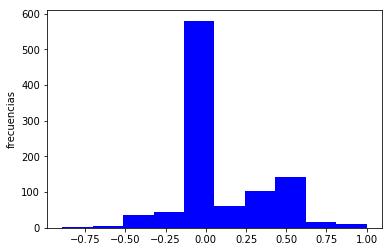

In [24]:
## Histograma de Frecuencias
plt.hist(sentiment_df["polarity"], color = "blue")
plt.ylabel("frecuencias")
plt.show()

In [0]:
## Barras

## Word Cloud

In [26]:
!pip install wordcloud

You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [27]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [0]:
# Generamos una nube de palabras

In [0]:
# Mostramos la imagen generada

In [28]:
## Seleccionamos el primer Tweet
sentiment_df.Tweet[0]

'Made it along to see #Avengers #Endgame tonight after all. Why did no one warn me I would cry?! But it really was w… https://t.co/k0AfohxRvr'

In [29]:
## Generamos la imagen
worl_cloud = WordCloud().generate(sentiment_df.Tweet[0])

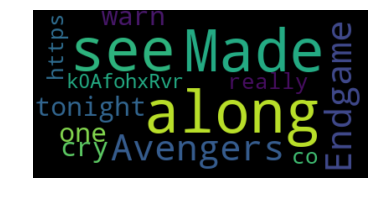

In [30]:
plt.imshow(worl_cloud,interpolation ="bilinear")
plt.axis("off")
plt.show()